Business Challenge: EDA and SQL


| **Attribute**                   | **Description**                                                                                   |
|----------------------------------|---------------------------------------------------------------------------------------------------|
| **Country**                      | The name of the country where the health data was recorded.                                       |
| **Year**                         | The year in which the data was collected.                                                        |
| **Disease Name**                 | The name of the disease or health condition tracked.                                             |
| **Disease Category**             | The category of the disease (e.g., Infectious, Non-Communicable).                                |
| **Prevalence Rate (%)**          | The percentage of the population affected by the disease.                                        |
| **Incidence Rate (%)**           | The percentage of new or newly diagnosed cases.                                                  |
| **Mortality Rate (%)**           | The percentage of the affected population that dies from the disease.                            |
| **Age Group**                    | The age range most affected by the disease.                                                      |
| **Gender**                       | The gender(s) affected by the disease (Male, Female, Both).                                      |
| **Population Affected**          | The total number of individuals affected by the disease.                                         |
| **Healthcare Access (%)**        | The percentage of the population with access to healthcare.                                      |
| **Doctors per 1000**             | The number of doctors per 1000 people.                                                          |
| **Hospital Beds per 1000**       | The number of hospital beds available per 1000 people.                                          |
| **Treatment Type**               | The primary treatment method for the disease (e.g., Medication, Surgery).                       |
| **Average Treatment Cost (USD)** | The average cost of treating the disease in USD.                                                |
| **Availability of Vaccines/Treatment** | Whether vaccines or treatments are available.                                                   |
| **Recovery Rate (%)**            | The percentage of people who recover from the disease.                                           |
| **DALYs**                        | Disability-Adjusted Life Years, a measure of disease burden.                                     |
| **Improvement in 5 Years (%)**   | The improvement in disease outcomes over the last five years.                                    |
| **Per Capita Income (USD)**      | The average income per person in the country.                                                   |
| **Education Index**              | The average level of education in the country.                                                  |
| **Urbanization Rate (%)**        | The percentage of the population living in urban areas.                                          |


In [11]:
import csv
import chardet

file_path = "Global Health Statistics.csv"

# count numer of rows
with open(file_path, 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    row_count = sum(1 for row in reader)

# show encoding
with open(file_path, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

print(f"Total number of rows: {row_count}")
print(f"Detected Encoding: {encoding}")


Total number of rows: 1000003
Detected Encoding: ascii


In [12]:
import csv
import chardet

# The original dataset is taking too long to insert, so I split into 10 chunks. 

input_file = "Global Health Statistics.csv"
num_chunks = 10  # Number of chunks to split the file into

# Detect encoding of the file
with open(input_file, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

# Count total rows in the file
with open(input_file, 'r', encoding=encoding) as infile:
    total_rows = sum(1 for _ in infile) - 1  # Subtract 1 for the header row

# Calculate rows per chunk
rows_per_chunk = total_rows // num_chunks
remainder = total_rows % num_chunks  # Handle any leftover rows

# Split the file into chunks
with open(input_file, 'r', encoding=encoding) as infile:
    reader = csv.reader(infile)
    header = next(reader)  # Save the header row

    chunk_number = 1
    rows = []

    for i, row in enumerate(reader, start=1):
        rows.append(row)
        if len(rows) == rows_per_chunk + (1 if remainder > 0 else 0):  # Add 1 row for chunks with remainder
            output_file = f"chunk_{chunk_number}.csv"
            with open(output_file, 'w', encoding='utf-8', newline='') as outfile:
                writer = csv.writer(outfile)
                writer.writerow(header)  # Write the header
                writer.writerows(rows)
            chunk_number += 1
            rows = []  # Clear the list for the next chunk
            if remainder > 0:
                remainder -= 1  # Decrease the remainder for the next chunk

    # Write the remaining rows
    if rows:
        output_file = f"chunk_{chunk_number}.csv"
        with open(output_file, 'w', encoding='utf-8', newline='') as outfile:
            writer = csv.writer(outfile)
            writer.writerow(header)
            writer.writerows(rows)

print(f"File successfully split into {chunk_number} chunks.")


File successfully split into 11 chunks.


In [19]:
import pymysql
import pandas as pd

# Database connection settings
host = "localhost"  # Replace with your host, e.g., 127.0.0.1 or a server address
user = "root"  # Replace with your MySQL username
password = "Malcomx1"  # Replace with your MySQL password
database = "GlobalHealth"  # Replace with your database name

# Establish the connection
connection = pymysql.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

print(f"Connected to the {database} database successfully!")


Connected to the GlobalHealth database successfully!


In [14]:
# Example query
query = "SELECT * FROM HealthStatistics LIMIT 10;"

# Execute the query and load the data into a DataFrame
df = pd.read_sql(query, connection)

# Display the DataFrame
print(df)



   id       Country  Year          DiseaseName DiseaseCategory  \
0   1         Italy  2013              Malaria     Respiratory   
1   2        France  2002                Ebola       Parasitic   
2   3        Turkey  2015             COVID-19         Genetic   
3   4     Indonesia  2011  Parkinson's Disease      Autoimmune   
4   5         Italy  2013         Tuberculosis         Genetic   
5   6  Saudi Arabia  2011               Dengue       Bacterial   
6   7           USA  2013              Malaria  Cardiovascular   
7   8       Nigeria  2007         Tuberculosis    Neurological   
8   9         Italy  2000               Rabies         Chronic   
9  10     Australia  2006              Cholera         Chronic   

   PrevalenceRate  IncidenceRate  MortalityRate AgeGroup  Gender  ...  \
0            0.95           1.55           8.42     0-18    Male  ...   
1           12.46           8.63           8.75      61+    Male  ...   
2            0.91           2.35           6.22    36-

C:\Users\dbigman\AppData\Local\Temp\ipykernel_13188\2624090142.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [15]:
query = """
SELECT *
FROM HealthStatistics
WHERE Year = 2020 AND DiseaseName = 'Malaria';
"""
df_filtered = pd.read_sql(query, connection)
print(df_filtered)


        id       Country  Year DiseaseName DiseaseCategory  PrevalenceRate  \
0      105     Australia  2020     Malaria         Genetic           12.89   
1      486       Nigeria  2020     Malaria       Bacterial           18.91   
2     1200         China  2020     Malaria    Neurological            7.81   
3     1325     Argentina  2020     Malaria      Autoimmune            2.21   
4     1544     Australia  2020     Malaria       Metabolic            1.60   
..     ...           ...   ...         ...             ...             ...   
196  99253  South Africa  2020     Malaria     Respiratory            9.22   
197  99350        Turkey  2020     Malaria       Bacterial            7.57   
198  99402         India  2020     Malaria       Metabolic           13.16   
199  99406        Mexico  2020     Malaria         Genetic            1.28   
200  99475     Indonesia  2020     Malaria       Metabolic           15.20   

     IncidenceRate  MortalityRate AgeGroup  Gender  ...  Hospit

C:\Users\dbigman\AppData\Local\Temp\ipykernel_13188\1969881993.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_filtered = pd.read_sql(query, connection)


In [21]:
# Question 1:
# Which infectious diseases have the highest prevalence rates globally, and how have these rates changed over the past 5 years?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


query = """
SELECT
    DiseaseName,
    DiseaseCategory,
    Year,
    `PrevalenceRate`,
    `ImprovementIn5Years`
FROM
    HealthStatistics
WHERE
    DiseaseCategory = 'Infectious'
ORDER BY
    Year DESC;
"""

# Execute the query and load the data into a pandas DataFrame
df = pd.read_sql(query, connection)

# Close the database connection
# connection.close()

# Analyze the data
print("Data retrieved successfully!")

# Group data to find the highest average prevalence rates globally
highest_prevalence = (
    df.groupby("DiseaseName")
    .agg(
        Avg_Prevalence=("PrevalenceRate", "mean"),
        Total_Prevalence=("PrevalenceRate", "sum")
    )
    .sort_values(by="Avg_Prevalence", ascending=False)
)

# Analyze the change in prevalence rates over the last 5 years
recent_years = df[df['Year'] >= df['Year'].max() - 5]

prevalence_change = (
    recent_years.groupby("DiseaseName")
    .agg(
        Initial_Prevalence=("PrevalenceRate", lambda x: x.iloc[0]),
        Latest_Prevalence=("PrevalenceRate", lambda x: x.iloc[-1])
    )
    .assign(Change_in_Prevalence=lambda x: x["Latest_Prevalence"] - x["Initial_Prevalence"])
    .sort_values(by="Change_in_Prevalence", ascending=False)
)

# Merge both results
result = highest_prevalence.merge(prevalence_change, on="DiseaseName", how="inner")

# Display results
print("\nTop Infectious Diseases by Prevalence:")
print(highest_prevalence.head(10))

print("\nChange in Prevalence Rates Over the Last 5 Years:")
print(prevalence_change.head(10))


# # Select the top 10 diseases by prevalence
# top_diseases = highest_prevalence["DiseaseName"].head(10)

# # Filter the dataframe for those diseases
# top_diseases_df = df[df["DiseaseName"].isin(top_diseases)].copy()

# # Sort by Year to ensure the lines are plotted in chronological order
# top_diseases_df.sort_values(by=["DiseaseName", "Year"], inplace=True)

# # Create a line plot
# plt.figure(figsize=(10, 6))
# sns.lineplot(
#     data=top_diseases_df, 
#     x="Year", 
#     y="PrevalenceRate", 
#     hue="DiseaseName", 
#     marker="o"
# )

# plt.title("Prevalence Rates Over the Years for Top Infectious Diseases")
# plt.xlabel("Year")
# plt.ylabel("Prevalence Rate")
# plt.legend(title="Disease Name", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.tight_layout()
# plt.show()

Data retrieved successfully!

Top Infectious Diseases by Prevalence:
                     Avg_Prevalence  Total_Prevalence
DiseaseName                                          
COVID-19                  10.374332           4502.46
Parkinson's Disease       10.153948           4680.97
Dengue                    10.132601           4519.14
Tuberculosis              10.105828           4699.21
Cholera                   10.101814           4343.78
Diabetes                  10.091485           4823.73
Influenza                 10.083030           4991.10
Ebola                     10.028004           5224.59
Zika                       9.962931           4622.80
Malaria                    9.956765           4739.42

Change in Prevalence Rates Over the Last 5 Years:
                     Initial_Prevalence  Latest_Prevalence  \
DiseaseName                                                  
Tuberculosis                       1.03              19.07   
Measles                            2.01       

C:\Users\dbigman\AppData\Local\Temp\ipykernel_13188\1322985517.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


C:\Users\dbigman\AppData\Local\Temp\ipykernel_13188\2576139669.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_question1 = pd.read_sql(query_1, connection)


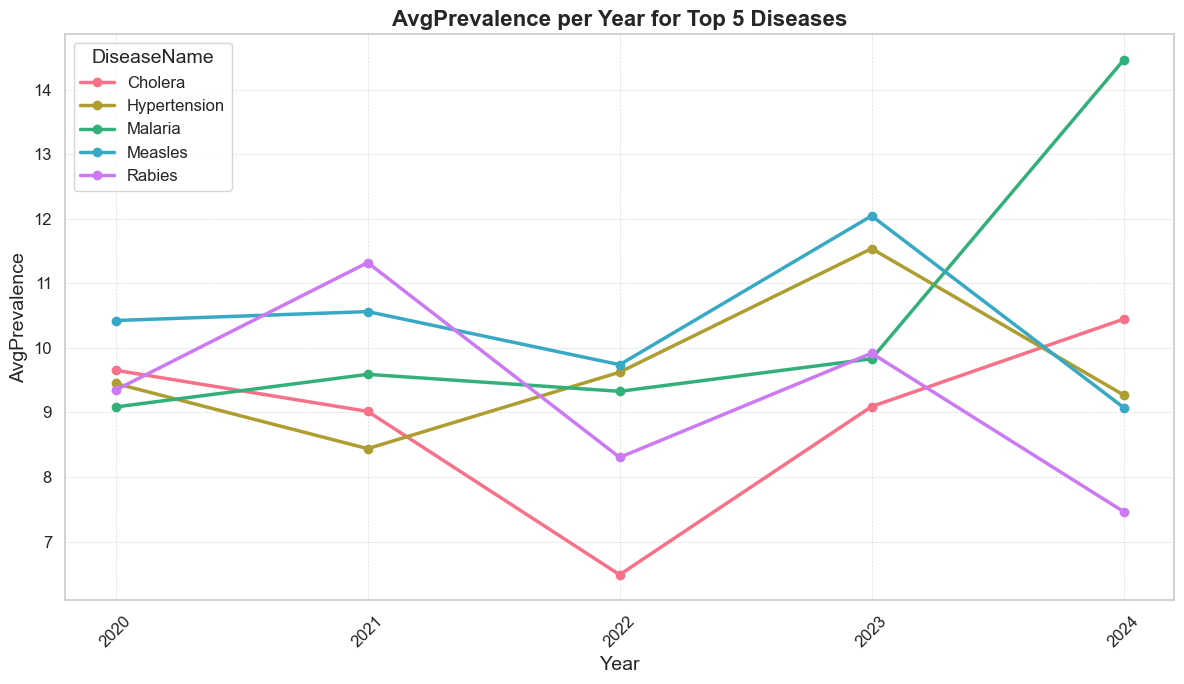

In [25]:
# Question 1:
# Which infectious diseases have the highest prevalence rates globally, 
# and how have these rates changed over the past 5 years?

query_1 = """
SELECT
    DiseaseName,
    Year,
    AVG(PrevalenceRate) AS AvgPrevalence
FROM HealthStatistics
WHERE
    DiseaseCategory = 'Infectious'
    AND Year BETWEEN 2020 AND 2024
GROUP BY
    DiseaseName,
    Year
"""
df_question1 = pd.read_sql(query_1, connection)

df_question1_sorted = df_question1.sort_values(by='Year')

# Select top 5 diseases by unique disease names 
top_diseases = df_question1_sorted['DiseaseName'].unique()[:5]


# Filter data for the top 5 diseases
top_diseases_data = df_question1_sorted[df_question1_sorted['DiseaseName'].isin(top_diseases)]

# et a seaborn style
sns.set_theme(style="whitegrid")

# Create a refined graph
plt.figure(figsize=(12, 7))
palette = sns.color_palette("husl", len(top_diseases))  # Use a colorful palette

for i, (disease, group) in enumerate(top_diseases_data.groupby('DiseaseName')):
    plt.plot(group['Year'], group['AvgPrevalence'], 
             marker='o', label=disease, color=palette[i], linewidth=2.5)

# Add labels and title
plt.title('AvgPrevalence per Year for Top 5 Diseases', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('AvgPrevalence', fontsize=14)
plt.xticks(sorted(df_question1_sorted['Year'].unique()), fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title="DiseaseName", fontsize=12, title_fontsize=14)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\dbigman\AppData\Local\Temp\ipykernel_13188\1944517882.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, connection, params=params)
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users

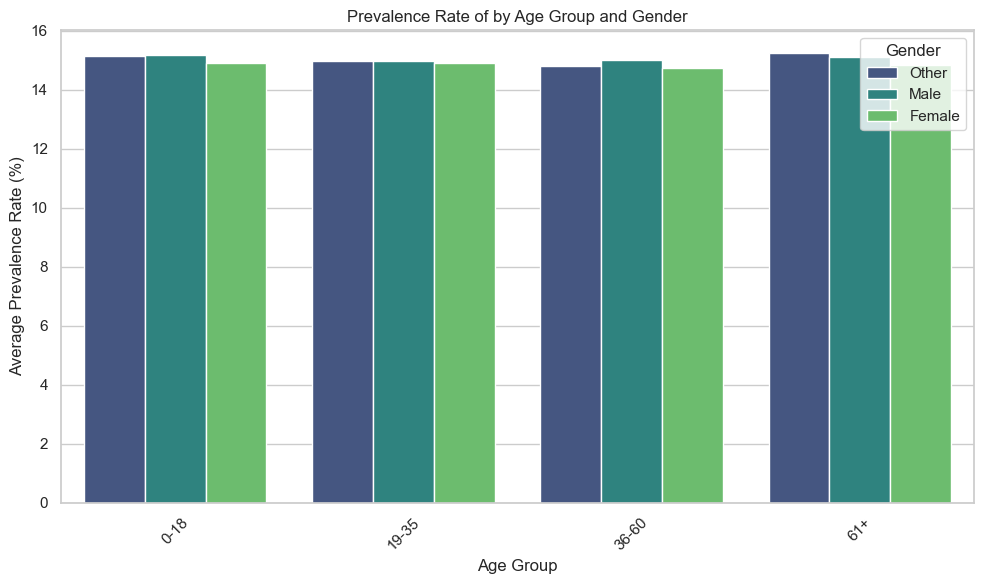

In [30]:
# Question 2:
# Which age groups and genders are most affected by high-prevalence infectious diseases? 
# Are there significant disparities?

def get_high_prevalence_data(connection: pymysql.connections.Connection, diseasecategory: str) -> pd.DataFrame:
    """    
    This function queries the `HealthStatistics` table to compute the average prevalence rate and 
    the total affected population for each combination of age group and gender within the specified 
    disease category. It filters the data to include only those entries where the prevalence rate 
    is greater than the average prevalence rate.

    Args:
        connection (pymysql.connections.Connection): A valid database connection created with PyMySQL.
        diseasecategory (str): The disease category to filter on (e.g., 'Infectious').

    Returns:
        pd.DataFrame: A pandas DataFrame containing columns:
                      - `AgeGroup`: The age group.
                      - `Gender`: The gender (Male, Female, Other).
                      - `AvgPrevalence`: The average prevalence rate for the group.
                      - `TotalAffected`: The total population affected for the group.
    """
        
    
    query = """
    SELECT
        AgeGroup,
        Gender,
        AVG(PrevalenceRate) AS AvgPrevalence,
        SUM(PopulationAffected) AS TotalAffected
    FROM HealthStatistics
    WHERE
        DiseaseCategory = %s
        AND PrevalenceRate > (
            SELECT AVG(PrevalenceRate)
            FROM HealthStatistics
            WHERE DiseaseCategory = %s
        )
    GROUP BY AgeGroup, Gender
    ORDER BY AvgPrevalence DESC;
    """
    params = (diseasecategory, diseasecategory)
    return pd.read_sql(query, connection, params=params)

# Call the function
df_question2 = get_high_prevalence_data(connection, 'Infectious')

# df_question2 = pd.read_sql(query_2, connection)

age_order = ['0-18', '19-35', '36-60', '61+']

df_question2['AgeGroup'] = pd.Categorical(df_question2['AgeGroup'], categories=age_order, ordered=True)

# Plot the graph with the updated order
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_question2,
    x="AgeGroup",
    y="AvgPrevalence",
    hue="Gender",
    palette="viridis"
)
plt.title("Prevalence Rate of by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Average Prevalence Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\dbigman\AppData\Local\Temp\ipykernel_13188\1639260823.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_question3 = pd.read_sql(query_3, connection)


           DiseaseName  AvgHealthcareAccess  AvgDoctorsPer1000  \
0              Malaria            74.786759           2.732954   
1                Ebola            74.704818           2.778387   
2             COVID-19            74.702642           2.706471   
3  Parkinson's Disease            74.792696           2.742936   
4         Tuberculosis            74.985969           2.764276   

   AvgRecoveryRate  
0        74.801839  
1        74.398003  
2        74.255789  
3        74.335690  
4        74.538776  
                     AvgHealthcareAccess  AvgDoctorsPer1000  AvgRecoveryRate
AvgHealthcareAccess             1.000000          -0.087803         0.336193
AvgDoctorsPer1000              -0.087803           1.000000        -0.058986
AvgRecoveryRate                 0.336193          -0.058986         1.000000


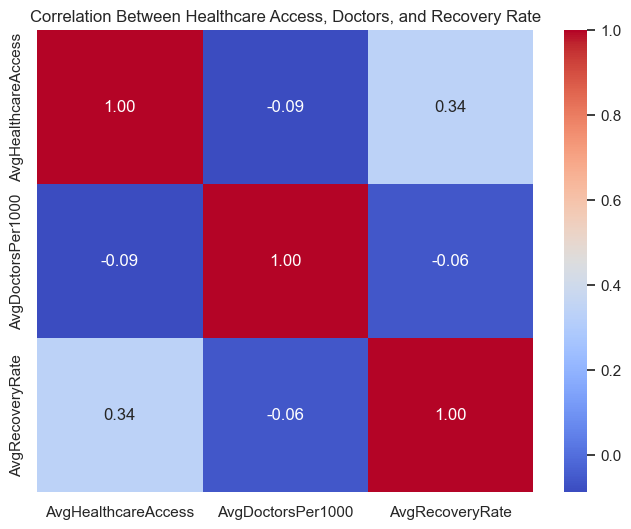

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype

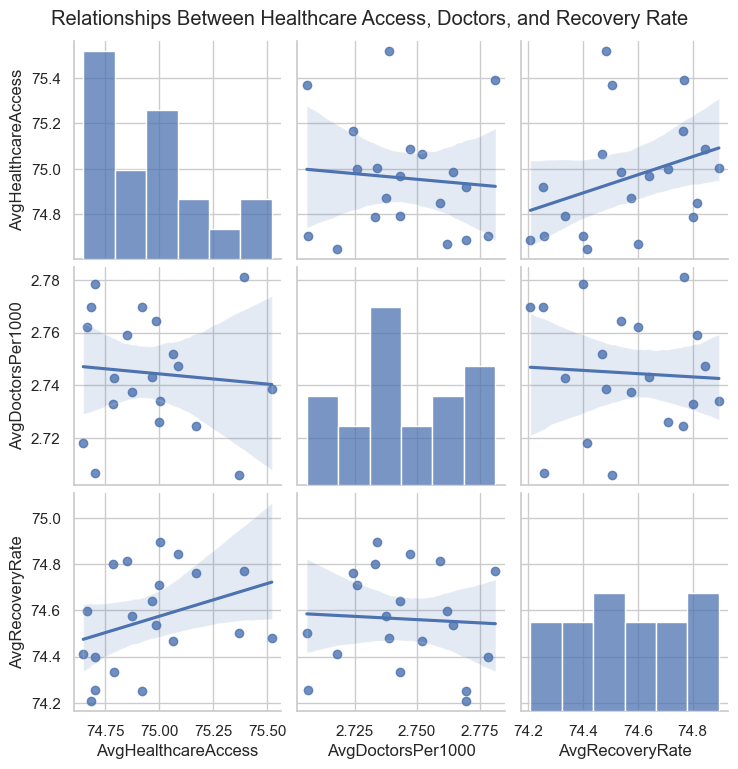

In [34]:
# Question 3: 
# Is there a correlation between healthcare access, the number of doctors per 1000 people, 
# and the recovery rate for specific diseases?

query_3 = """
SELECT
    DiseaseName,
    AVG(HealthcareAccess) AS AvgHealthcareAccess,
    AVG(DoctorsPer1000) AS AvgDoctorsPer1000,
    AVG(RecoveryRate) AS AvgRecoveryRate
FROM HealthStatistics
GROUP BY DiseaseName;
"""

df_question3 = pd.read_sql(query_3, connection)
print(df_question3.head())

correlation_matrix = df_question3[[
    'AvgHealthcareAccess',
    'AvgDoctorsPer1000',
    'AvgRecoveryRate'
]].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Healthcare Access, Doctors, and Recovery Rate")
plt.show()


sns.pairplot(
    df_question3,
    vars=['AvgHealthcareAccess', 'AvgDoctorsPer1000', 'AvgRecoveryRate'],
    kind="reg"
)
plt.suptitle("Relationships Between Healthcare Access, Doctors, and Recovery Rate", y=1.02)
plt.show()



C:\Users\dbigman\AppData\Local\Temp\ipykernel_13188\574403037.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_question4 = pd.read_sql(query_4, connection)


    DiseaseName  AvgMortalityRate  AvgPerCapitaIncome  AvgEducationIndex
0       Malaria          5.148557        51036.541119           0.656155
1     Hepatitis          5.111002        50134.584410           0.648586
2        Rabies          5.087610        50758.945881           0.648486
3  Tuberculosis          5.085437        49793.941319           0.650789
4       Measles          5.082200        50287.037513           0.649193
                    AvgMortalityRate  AvgPerCapitaIncome  AvgEducationIndex
AvgMortalityRate            1.000000            0.119010           0.742968
AvgPerCapitaIncome          0.119010            1.000000           0.346141
AvgEducationIndex           0.742968            0.346141           1.000000


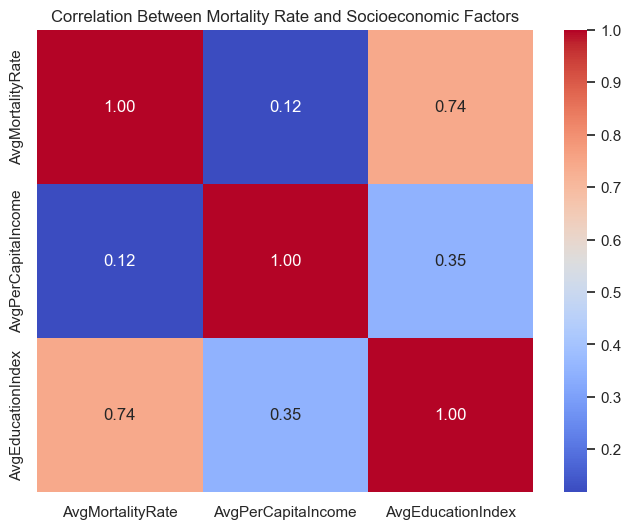

In [38]:
# Question 4: 
# Which infectious diseases have the highest mortality rates, and how do socioeconomic factors 
# (e.g., per capita income, education index) influence these rates?

query_4 = """
SELECT
    DiseaseName,
    AVG(MortalityRate) AS AvgMortalityRate,
    AVG(PerCapitaIncome) AS AvgPerCapitaIncome,
    AVG(EducationIndex) AS AvgEducationIndex
FROM HealthStatistics
GROUP BY DiseaseName
ORDER BY AvgMortalityRate DESC
LIMIT 10;
"""

df_question4 = pd.read_sql(query_4, connection)
print(df_question4.head())

# Calculate correlations
correlation_matrix = df_question4[[
    'AvgMortalityRate', 
    'AvgPerCapitaIncome', 
    'AvgEducationIndex'
]].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Mortality Rate and Socioeconomic Factors")
plt.show()